In [39]:
import pandas as pd
import numpy as np
sys_df = pd.read_csv("us-covid-19-total-people-vaccinated.csv")
unwanted_regions = ["American Samoa", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "Guam", "Long Term Care", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Puerto Rico", "Republic of Palau", "Virgin Islands", "Veterans Health", "United States"]
clean_df = sys_df[sys_df['Entity'].isin(unwanted_regions) == False]
# I am thinking to first plot all 50 states for their percentage of people vaccinated over time using existing data only
# Once I have the trajectory prediction model working then we can redo this plot except with new data that reaches to August or September
#In order to do a national cumulative, we will need to multiply every entry by the respective state population then divide by 100.

print("Scenario One: reaching herd immunity assuming that all people who get vaccinated includes all the people that had Covid in the past")

us_pop = 332915073 #population value from macrotrends

nt_df = clean_df.groupby('Day').sum()

nt_df = nt_df.reset_index()

nt_df_og_tail = nt_df.tail()

while nt_df.iloc[-1]['people_vaccinated'] < us_pop: 
    ten_days = nt_df.iloc[-9:]['people_vaccinated']

    ten_days_inc = ten_days.diff()

    ten_day_ave = np.mean(ten_days_inc)

    next_day_val = nt_df.iloc[-1]['people_vaccinated'] + ten_day_ave

    next_day_date = (pd.to_datetime(nt_df.iloc[-1]['Day']) + pd.to_timedelta(np.ceil(1), unit="D")).date()

    nt_df = nt_df.append({'Day': str(next_day_date), 'people_vaccinated': next_day_val}, ignore_index=True)

nt_df['percent_vaccinated'] = nt_df['people_vaccinated'] / us_pop

nt_df.tail()


#Possibly add CI with smallest and largest increments in future scenarios"

Scenario One: reaching herd immunity assuming that all people who get vaccinated includes all the people that had Covid in the past


,Day,people_vaccinated,percent_vaccinated
193,2021-07-28,3.254037e+08,0.977438
194,2021-07-29,3.273268e+08,0.983214
195,2021-07-30,3.292499e+08,0.988991
196,2021-07-31,3.311730e+08,0.994767
197,2021-08-01,3.330961e+08,1.000544


In [31]:
print("Looking at scenario one's dataset predictions, we can see that the country reaches 100% herd immunity on August 1st, 2021")

Looking at scenario one's dataset predictions, we can see that the country reaches 100% herd immunity on August 1st, 2021


In [32]:
#Data Setup
#people_vac_df: holds data for total people vaccinated in US from 2021-01-12 to 2021-04-04
#people_case_df: holds data for total people with covid in US from 2020-01-22 to 2021-04-09

#step 1: get both dataframes to line up on dates by slicing people_case_df to become 2021-01-12 to 2021-04-04
#step 2: create new dataframe holding data from both dataframes
#step 3: create new column that does people_vaccinated + .2 * people_with_covid for every row
#step 4: run predictions on this new combined column for more accurate prediction

In [33]:
print("Scenario Two: reaching herd immunity assuming that 20% of people vaccinated had Covid")

us_pop = 332915073 #population value from macrotrends

covid_cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
sys_df = pd.read_csv("us-covid-19-total-people-vaccinated.csv")
unwanted_regions = ["American Samoa", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "Guam", "Long Term Care", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Puerto Rico", "Republic of Palau", "Virgin Islands", "Veterans Health", "United States"]
clean_df = sys_df[sys_df['Entity'].isin(unwanted_regions) == False]

total_cases = covid_cases.groupby('submission_date').sum()
total_cases = total_cases.reset_index()
total_cases['submission_date'] = pd.to_datetime(total_cases['submission_date'])
total_cases = total_cases.sort_values(by="submission_date")

start_date = '2021-01-12'
end_date = '2021-04-04'
mask = (total_cases['submission_date'] >= start_date) & (total_cases['submission_date'] <= end_date)
total_cases_df = total_cases[(total_cases['submission_date'] >= start_date) & (total_cases['submission_date'] <= end_date)]

total_cases_df = total_cases_df.rename(columns={"submission_date": "Day"})

# total_cases_df.head()


total_vax = clean_df.groupby('Day').sum()

total_vax = total_vax.reset_index()

total_vax['Day'] = pd.to_datetime(total_vax['Day'])

combined_df = total_vax.merge(total_cases_df, on='Day')

combined_df = combined_df.sort_values(by="Day")

combined_df['adjusted_vax'] = combined_df['people_vaccinated'] + .2 * combined_df['tot_cases']

combined_df = combined_df[['Day','adjusted_vax']]

combined_df.tail()


while combined_df.iloc[-1]['adjusted_vax'] < us_pop: 
    ten_days = combined_df.iloc[-9:]['adjusted_vax']

    ten_days_inc = ten_days.diff()

    ten_day_ave = np.mean(ten_days_inc)

    next_day_val = combined_df.iloc[-1]['adjusted_vax'] + ten_day_ave

    next_day_date = (pd.to_datetime(combined_df.iloc[-1]['Day']) + pd.to_timedelta(np.ceil(1), unit="D")).date()
        
    combined_df = combined_df.append({'Day': next_day_date, 'adjusted_vax': next_day_val}, ignore_index=True)

combined_df['percent_vaccinated'] = combined_df['adjusted_vax'] / us_pop

combined_df.tail()



Scenario Two: reaching herd immunity assuming that 20% of people vaccinated had Covid


,Day,adjusted_vax,percent_vaccinated
189,2021-07-24,3.251885e+08,0.976791
190,2021-07-25,3.271240e+08,0.982605
191,2021-07-26,3.290594e+08,0.988418
192,2021-07-27,3.309948e+08,0.994232
193,2021-07-28,3.329302e+08,1.000046


In [34]:
print("Looking at scenario two's dataset predictions, we can see that the country reaches 100% herd immunity on July 28th, 2021")

Looking at scenario two's dataset predictions, we can see that the country reaches 100% herd immunity on July 28th, 2021


In [40]:
nt_df

,Day,people_vaccinated,percent_vaccinated
0,2021-01-12,6.973812e+06,0.020948
1,2021-01-13,7.561180e+06,0.022712
2,2021-01-14,9.101385e+06,0.027338
3,2021-01-15,9.942410e+06,0.029865
4,2021-01-19,1.276321e+07,0.038338
...,...,...,...
193,2021-07-28,3.254037e+08,0.977438
194,2021-07-29,3.273268e+08,0.983214
195,2021-07-30,3.292499e+08,0.988991
196,2021-07-31,3.311730e+08,0.994767


[Text(0.5, 1.0, 'Projections of percent vaccinated versus day for US assuming 20% of vaccinated got COVID'),
 Text(0, 0.5, 'Percent Vaccinated')]

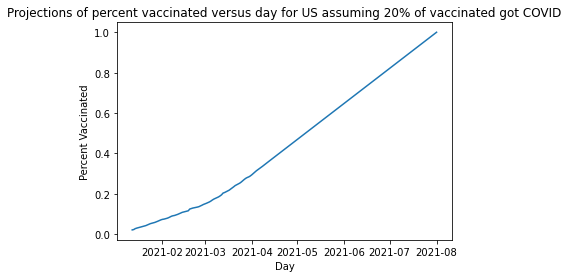

In [44]:
import seaborn as sns, datetime 

nt_df['Day']= pd.to_datetime(nt_df['Day'])
sns.lineplot(x="Day", y="percent_vaccinated", data = nt_df).set(title="Projections of percent vaccinated versus day for US assuming 20% of vaccinated got COVID", ylabel="Percent Vaccinated")

[Text(0.5, 1.0, 'Projections of percent vaccinated versus day for US'),
 Text(0, 0.5, 'Percent Vaccinated')]

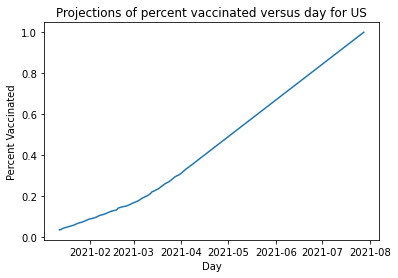

In [42]:

sns.lineplot(x="Day", y="percent_vaccinated", data = combined_df).set(title="Projections of percent vaccinated versus day for US", ylabel="Percent Vaccinated")